In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
os.chdir('C:\\Users\\omkarp\\Downloads\\Vania\\')
df2018 = pd.read_excel('Synpunktsärenden_2018.xlsx')
df2019 = pd.read_excel('Synpunktsärenden_2019.xlsx')
df2020 = pd.read_excel('Synpunktsärenden_2020.xlsx')
df2021 = pd.read_excel('Synpunktsärenden_2021.xlsx')
df2022 = pd.read_excel('Synpunktsärenden_2022.xlsx')
df2023 = pd.read_excel('Synpunktsärenden_2023.xlsx')
df2018.head()

,Ärendenummer,Kategori,Gata/Gator,Gatunummer,Områdestyp,Inkommet Datum,DpFeatureType,SynpunktCommonWord,Koordinater_Y,Koordinater_X
0,1,Felanmälan,NaN,NaN,Gata,2018-01-01 01:59:48,Byggsäckar,Byggsäck/storsäck,NaN,NaN
1,2,Fråga,Tackjärnsvägen,2,Gata,2018-01-01 07:31:57,Städning,NaN,148361.65,6581124.62
2,3,Fråga,Drottningholmsvägen,428,Gata,2018-01-01 07:34:02,Parkering,NaN,146492.62,6580523.56
3,4,Fråga,Gamla Bromstensvägen,111,Gata,2018-01-01 10:36:41,Gatuunderhåll,NaN,145686.55,6583814.34
4,5,Fråga,Frejgatan,1,Gata,2018-01-01 10:52:50,Generellt,NaN,153530.46,6581497.33


In [3]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26483 entries, 0 to 26482
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ärendenummer        26483 non-null  int64         
 1   Kategori            26483 non-null  object        
 2   Gata/Gator          20690 non-null  object        
 3   Gatunummer          16639 non-null  object        
 4   Områdestyp          26483 non-null  object        
 5   Inkommet Datum      26483 non-null  datetime64[ns]
 6   DpFeatureType       26483 non-null  object        
 7   SynpunktCommonWord  14341 non-null  object        
 8   Koordinater_Y       19828 non-null  float64       
 9   Koordinater_X       19829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 2.0+ MB


# Seperately Analyzing for trends

## Calculate counts for available data vs that with attributed coordinates

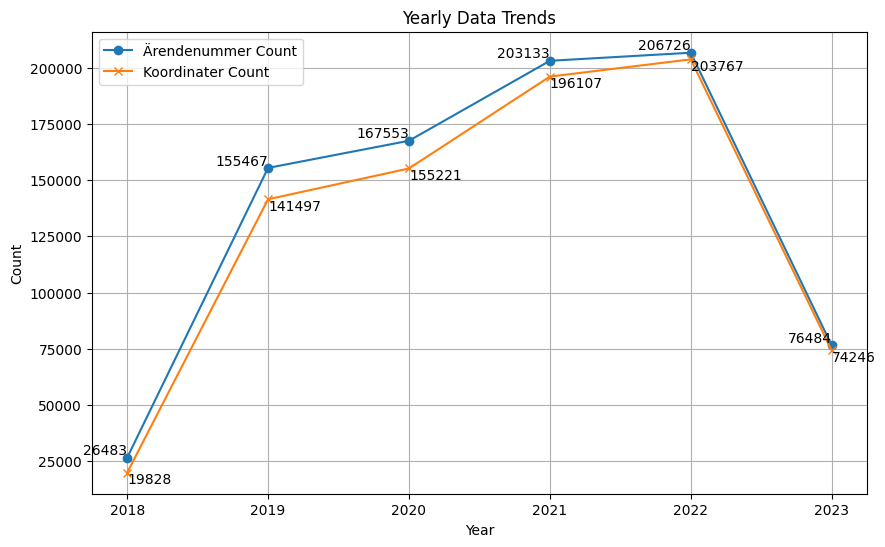

In [4]:
def calculate_counts(df):
    count_arendenummer = df['Ärendenummer'].notnull().sum()
    count_koordinater = df[['Koordinater_Y', 'Koordinater_X']].dropna(how='any').shape[0]
    return count_arendenummer, count_koordinater

counts = {
    year: calculate_counts(df) for year, df in zip(
        range(2018, 2024), [df2018, df2019, df2020, df2021, df2022, df2023]
    )
}
years = list(counts.keys())
count_arendenummer = [cnt[0] for cnt in counts.values()]
count_koordinater = [cnt[1] for cnt in counts.values()]

plt.figure(figsize=(10, 6))
plt.plot(years, count_arendenummer, label='Ärendenummer Count', marker='o')
plt.plot(years, count_koordinater, label='Koordinater Count', marker='x')

# Adding labels to the points
for i in range(len(years)):
    plt.text(years[i], count_arendenummer[i], f'{count_arendenummer[i]}', ha='right', va='bottom')
    plt.text(years[i], count_koordinater[i], f'{count_koordinater[i]}', ha='left', va='top')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Data Trends')
plt.legend()
plt.grid(True)
plt.show()

## Amount of data in each month with coordinate data

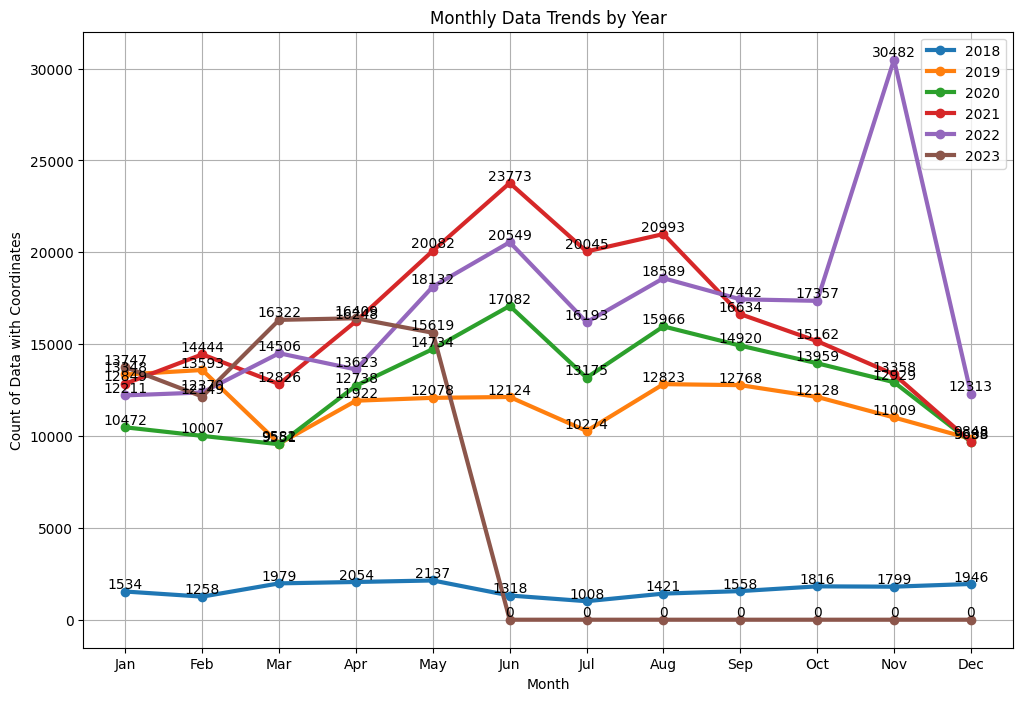

In [5]:
def preprocess_and_group_by_month(df):
    df['Inkommet Datum'] = pd.to_datetime(df['Inkommet Datum'])
    filtered_df = df.dropna(subset=['Koordinater_Y', 'Koordinater_X'])
    return filtered_df.groupby(filtered_df['Inkommet Datum'].dt.month).size()

monthly_data = {
    year: preprocess_and_group_by_month(df) for year, df in zip(
        range(2018, 2024), [df2018, df2019, df2020, df2021, df2022, df2023]
    )
}
plt.figure(figsize=(12, 8))
months = range(1, 13)  # Months from January to December
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for year, data in monthly_data.items():
    monthly_counts = [data.get(month, 0) for month in months]
    plt.plot(month_names, monthly_counts, label=f'{year}', marker='o', linewidth=3)
    for i, count in enumerate(monthly_counts):
        plt.text(month_names[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Count of Data with Coordinates')
plt.title('Monthly Data Trends by Year')
plt.legend()
plt.grid(True)
plt.show()

## Amount of data available in each month of each year

In [6]:
def count_days_with_data(df):
    df = df.dropna(subset=['Koordinater_Y', 'Koordinater_X'])
    df['Inkommet Datum'] = pd.to_datetime(df['Inkommet Datum'])
    return df.groupby(df['Inkommet Datum'].dt.month)['Inkommet Datum'].nunique()

days_count_data = {
    year: count_days_with_data(df) for year, df in zip(
        range(2018, 2024), [df2018, df2019, df2020, df2021, df2022, df2023]
    )
}

days_count_df = pd.DataFrame(days_count_data)
days_count_df.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_count_df

,2018,2019,2020,2021,2022,2023
Jan,1511,13101,10364,12605,11971,13458.0
Feb,1242,13369,9877,14134,12184,11880.0
Mar,1942,9466,9413,12508,14211,15974.0
Apr,2018,11731,12528,15886,13178,16161.0
May,2079,11978,14435,19692,17637,15317.0
Jun,1289,11988,16696,23471,20066,NaN
Jul,998,10190,12904,19810,15910,NaN
Aug,1393,12707,15672,20639,18172,NaN
Sep,1522,12577,14505,16430,17084,NaN
Oct,1761,12025,13479,14929,17094,NaN


In [7]:
# Number of days of data available in each month of each year

def count_days_with_data(df):
    df = df.dropna(subset=['Koordinater_Y', 'Koordinater_X'])
    df['Inkommet Datum'] = pd.to_datetime(df['Inkommet Datum'])
    df['Month'] = df['Inkommet Datum'].dt.month  # Extract month
    df['Date'] = df['Inkommet Datum'].dt.date    # Extract date
    return df.groupby('Month')['Date'].nunique()

days_count_data = {
    year: count_days_with_data(df) for year, df in zip(
        range(2018, 2024), [df2018, df2019, df2020, df2021, df2022, df2023]
    )
}

days_count_df = pd.DataFrame(days_count_data)
days_count_df.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_count_df

,2018,2019,2020,2021,2022,2023
Jan,31,31,31,31,31,31.0
Feb,28,28,29,28,28,28.0
Mar,31,31,31,31,31,31.0
Apr,30,30,30,30,30,30.0
May,31,31,31,31,31,30.0
Jun,30,30,30,30,30,NaN
Jul,31,31,31,31,31,NaN
Aug,31,31,31,31,31,NaN
Sep,30,30,30,30,30,NaN
Oct,31,31,31,31,31,NaN


## Unique Kategories counts

In [8]:
unique_categories = pd.concat([df2018, df2019, df2020, df2021, df2022, df2023])['Kategori'].unique()
category_counts = {category: [] for category in unique_categories}

for df in [df2018, df2019, df2020, df2021, df2022, df2023]:
    counts = df['Kategori'].value_counts()
    for category in unique_categories:
        category_counts[category].append(counts.get(category, 0))

category_count_df = pd.DataFrame(category_counts, index=range(2018, 2024)).T
category_count_df

,2018,2019,2020,2021,2022,2023
Felanmälan,578,99633,104885,121857,135824,52089
Fråga,14841,27568,32059,46229,30813,11258
Klagomål,9130,22528,23139,26111,28431,9277
Beröm,508,1124,1278,1475,1299,533
Idé,1426,4614,6192,6064,5158,1852
Ordningsstörning,0,0,0,1397,5201,1475


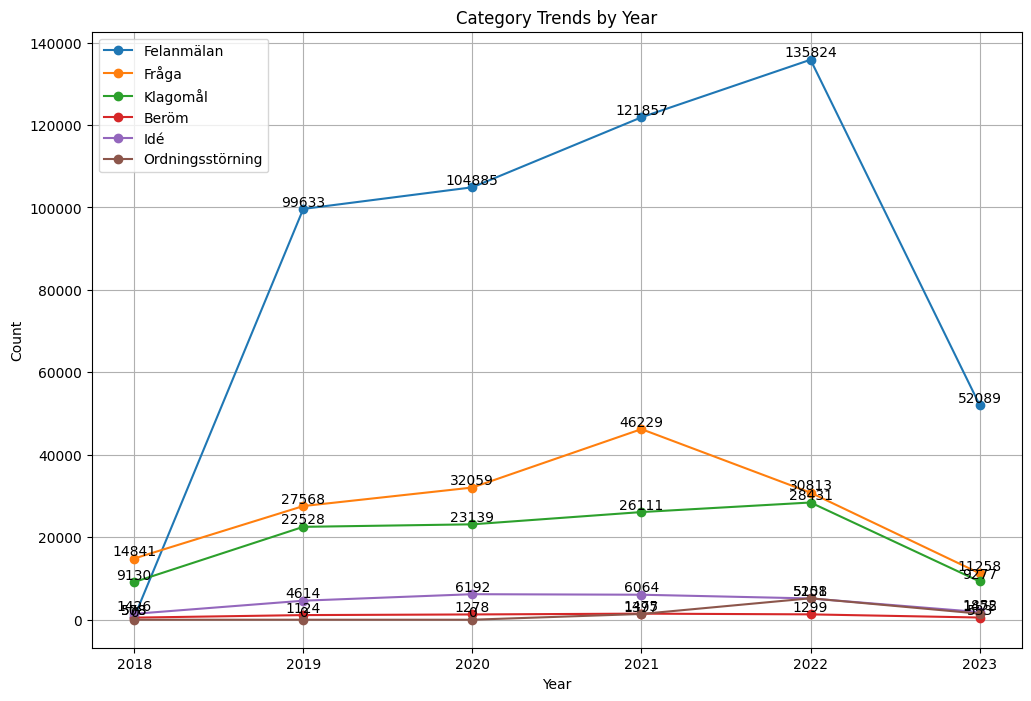

In [9]:
plt.figure(figsize=(12, 8))
category_count_df = category_count_df.T

for category in unique_categories:
    plt.plot(category_count_df.index, category_count_df[category], label=category, marker='o')
    for year, count in zip(category_count_df.index, category_count_df[category]):
        plt.text(year, count, str(count), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Category Trends by Year')
plt.legend()
plt.grid(True)
plt.show()

## Unique reportings in 'DpFeatureType', 'SynpunktCommonWord'

In [10]:
def count_unique_values(df, column_name):
    return df[column_name].value_counts()
dfs = [df2018, df2019, df2020, df2021, df2022, df2023]

# Counting unique values for 'DpFeatureType'

dp_feature_counts = {year: count_unique_values(df, 'DpFeatureType') for year, df in zip(range(2018, 2024), dfs)}
dp_feature_df = pd.DataFrame(dp_feature_counts)
dp_feature_df.sort_values(by=2022, ascending=False, inplace=True)  # Sort by 2022 counts
dp_feature_df.to_csv('dp_feature_df.csv', index=False)
dp_feature_df.head(15)

,2018,2019,2020,2021,2022,2023
DpFeatureType,,,,,,
Klotter,173.0,17577.0,21241.0,26724.0,28979.0,12445.0
Städning,1248.0,15849.0,17536.0,18824.0,18496.0,6080.0
Vinterväghållning,1621.0,11272.0,415.0,10484.0,18170.0,6652.0
Generellt,5284.0,11052.0,13676.0,13282.0,12414.0,4733.0
Belysning,758.0,11754.0,12847.0,9675.0,9910.0,3705.0
Felparkering,1014.0,6053.0,7189.0,9010.0,7775.0,2604.0
Skylt,183.0,6220.0,5744.0,5861.0,7503.0,2921.0
Parker,343.0,3930.0,5270.0,5620.0,6404.0,2167.0
Gatuträd,273.0,2732.0,2217.0,2235.0,6365.0,2223.0


In [11]:
# Counting unique values for 'SynpunktCommonWord'

synpunkt_counts = {year: count_unique_values(df, 'SynpunktCommonWord') for year, df in zip(range(2018, 2024), dfs)}

synpunkt_df = pd.DataFrame(synpunkt_counts)
synpunkt_df.sort_values(by=2022, ascending=False, inplace=True)  # Sort by 2022 counts
synpunkt_df.to_csv('synpunkt_df.csv', index=False)
synpunkt_df.head(15)

,2018,2019,2020,2021,2022,2023
SynpunktCommonWord,,,,,,
Klotter (bifoga bild),NaN,NaN,NaN,NaN,21955.0,10794.0
Skräp,767.0,10418.0,13198.0,14072.0,11554.0,2937.0
"Snöröjning, plogning",421.0,2719.0,33.0,3490.0,10048.0,2250.0
"Belysning, lampa i gång- och gatumiljö",268.0,7944.0,7776.0,5777.0,7536.0,2921.0
Felparkerat fordon,NaN,1054.0,5918.0,8073.0,6969.0,2434.0
Övrigt,790.0,5064.0,6170.0,7164.0,6407.0,2289.0
Parkering - Akut Välj felanmälan,174.0,2509.0,3722.0,4707.0,5980.0,2321.0
Klotter elskåp (bifoga bild),NaN,NaN,NaN,NaN,4883.0,1529.0
Papperskorgar,307.0,5015.0,6075.0,6303.0,4148.0,1010.0


### Consider counts for Beröm

In [12]:
def count_unique_values_berom(df, column_name):
    filtered_df = df[df['Kategori'] == 'Beröm']
    return filtered_df[column_name].value_counts()

# Counting unique values for 'DpFeatureType' where 'Kategori' is 'Beröm'

dp_feature_berom_counts = {year: count_unique_values_berom(df, 'DpFeatureType') for year, df in zip(range(2018, 2024), dfs)}
dp_feature_berom_df = pd.DataFrame(dp_feature_berom_counts)
dp_feature_berom_df.sort_values(by=2022, ascending=False, inplace=True)  # Sort by 2022 counts
dp_feature_berom_df.to_csv('dp_feature_berom_df.csv', index=False)
dp_feature_berom_df.head(15)

,2018,2019,2020,2021,2022,2023
DpFeatureType,,,,,,
Vinterväghållning,101.0,156.0,3.0,277.0,185.0,129.0
Parker,14.0,91.0,139.0,169.0,152.0,18.0
Städning,51.0,86.0,129.0,81.0,97.0,54.0
Generellt,16.0,88.0,157.0,111.0,88.0,40.0
Belysning,13.0,56.0,87.0,61.0,60.0,22.0
Blomsterprogrammet,10.0,23.0,35.0,44.0,48.0,17.0
Grönområde,3.0,52.0,37.0,52.0,47.0,28.0
Bänkar,6.0,11.0,18.0,16.0,38.0,8.0
Gatuunderhåll,13.0,41.0,43.0,42.0,30.0,15.0


In [13]:
# Counting unique values for 'SynpunktCommonWord' where 'Kategori' is 'Beröm'

synpunkt_berom_counts = {year: count_unique_values_berom(df, 'SynpunktCommonWord') for year, df in zip(range(2018, 2024), dfs)}
synpunkt_berom_df = pd.DataFrame(synpunkt_berom_counts)
synpunkt_berom_df.sort_values(by=2022, ascending=False, inplace=True)  # Sort by 2022 counts
synpunkt_berom_df.to_csv('synpunkt_berom_df.csv', index=False)
synpunkt_berom_df.head(15)

,2018,2019,2020,2021,2022,2023
SynpunktCommonWord,,,,,,
"Parker, parkunderhåll",17.0,63.0,99.0,113.0,90.0,15.0
"Snöröjning, plogning",35.0,57.0,NaN,138.0,83.0,53.0
"Blommor, blomster",6.0,22.0,44.0,59.0,62.0,18.0
Övrigt,19.0,59.0,88.0,87.0,59.0,32.0
"Städning på gator, torg och trottoar",24.0,47.0,55.0,42.0,58.0,51.0
"Snöröjning cykelväg, gångbana och trottoar",36.0,50.0,1.0,91.0,47.0,37.0
"Belysning, lampa i gång- och gatumiljö",7.0,28.0,38.0,23.0,45.0,19.0
"Cykelbana, cykelväg, cykelfält",21.0,71.0,48.0,58.0,40.0,17.0
Gatuunderhåll,10.0,35.0,40.0,52.0,38.0,17.0


# Compile the data together for analysis

In [14]:
filtered_dfs = [df for df in [df2018, df2019, df2020, df2021, df2022, df2023]]
data0 = pd.concat(filtered_dfs)
data0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835846 entries, 0 to 76483
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Ärendenummer        835846 non-null  int64         
 1   Kategori            835846 non-null  object        
 2   Gata/Gator          804021 non-null  object        
 3   Gatunummer          768926 non-null  object        
 4   Områdestyp          835846 non-null  object        
 5   Inkommet Datum      835846 non-null  datetime64[ns]
 6   DpFeatureType       835846 non-null  object        
 7   SynpunktCommonWord  742503 non-null  object        
 8   Koordinater_Y       790666 non-null  float64       
 9   Koordinater_X       790673 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 70.1+ MB


In [15]:
filtered_dfs = [df.dropna(subset=['Koordinater_Y', 'Koordinater_X']) for df in [df2018, df2019, df2020, df2021, df2022, df2023]]
data = pd.concat(filtered_dfs)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790666 entries, 1 to 76483
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Ärendenummer        790666 non-null  int64         
 1   Kategori            790666 non-null  object        
 2   Gata/Gator          790432 non-null  object        
 3   Gatunummer          755341 non-null  object        
 4   Områdestyp          790666 non-null  object        
 5   Inkommet Datum      790666 non-null  datetime64[ns]
 6   DpFeatureType       790666 non-null  object        
 7   SynpunktCommonWord  721670 non-null  object        
 8   Koordinater_Y       790666 non-null  float64       
 9   Koordinater_X       790666 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 66.4+ MB


## Sentimental analysis for Trygghetshändelrna

In [16]:
unique_dp_feature_type = data['DpFeatureType'].unique()
unique_synpunkt_common_word = data['SynpunktCommonWord'].unique()

combined_unique_values = set(unique_dp_feature_type).union(set(unique_synpunkt_common_word))

combined_unique_values_list = list(combined_unique_values)
combined_unique_values_list

[nan,
 'Gatuträd',
 'Byggsäck, storsäck',
 'Belysning, lampa gångbana i park',
 'Infarter',
 'Björnloka',
 'Parkeringsautomat, p-automat',
 'Reinvesteringsprogram',
 'Parkträd',
 'Parkslide',
 'Klotter elskåp (bifoga bild)',
 'Vägmärke trasig',
 'Miljözon',
 'Avstängning',
 'Trafiksäkerhet vid skolor',
 'PM10',
 'Parkeringsplats rörelsehindrad/handikapp-plats',
 'Vinter Körbana',
 'Parkeringsregler',
 'Sättning i gångbana',
 'Evenemang',
 'Högtid/Flaggning',
 'Träd och planteringar',
 'Grönområde',
 'Narkotika / droganvändning',
 'Källsortering TK',
 'Belysning cykelbana',
 'Paketbox',
 'Cykelväg sopsaltning',
 'Trafikbuller',
 'Lånecykel',
 'Offentliga toaletter',
 'Uteservering/restauranger fullsatt/trängsel',
 'Avföring',
 'Städning av gator och parker',
 'Cykeljouren Underhåll',
 'Otrygghet',
 'Offentliga toaletter önskemål',
 'Byggnadsställning',
 'Vibrationer i fastighet',
 'Felparkerat fordon',
 'Skylt',
 'Lövstädning/lövhög',
 'Elsparkcykel',
 'Generellt',
 'Foodtrucks/matbil',

## Filter rows where 'Kategori' is 'Beröm'

In [17]:
# Filter the DataFrame for rows where 'Kategori' is 'Beröm'
berom_df = data[data['Kategori'] == 'Beröm']

# Extract unique values from 'DpFeatureType' and 'SynpunktCommonWord'
unique_dp_feature_type_berom = berom_df['DpFeatureType'].unique()
unique_synpunkt_common_word_berom = berom_df['SynpunktCommonWord'].unique()

# Combine the unique values from both columns into a single set
combined_unique_values_berom = set(unique_dp_feature_type_berom).union(set(unique_synpunkt_common_word_berom))

# Convert the set back to a list if needed
combined_unique_values_berom_list = list(combined_unique_values_berom)

# Removing any NaNs if they exist
combined_unique_values_berom_list = [x for x in combined_unique_values_berom_list if pd.notna(x)]

combined_unique_values_berom_list

['Gatuträd',
 'Byggsäck, storsäck',
 'Belysning, lampa gångbana i park',
 'Infarter',
 'Björnloka',
 'Parkeringsautomat, p-automat',
 'Parkträd',
 'Parkslide',
 'Miljözon',
 'Avstängning',
 'Trafiksäkerhet vid skolor',
 'Parkeringsregler',
 'Evenemang',
 'Högtid/Flaggning',
 'Träd och planteringar',
 'Grönområde',
 'Belysning cykelbana',
 'Paketbox',
 'Cykelväg sopsaltning',
 'Trafikbuller',
 'Lånecykel',
 'Offentliga toaletter',
 'Avföring',
 'Cykeljouren Underhåll',
 'Städning av gator och parker',
 'Offentliga toaletter önskemål',
 'Otrygghet',
 'Byggnadsställning',
 'Vibrationer i fastighet',
 'Skylt',
 'Lövstädning/lövhög',
 'Elsparkcykel',
 'Generellt',
 'Väggupp',
 'Tunnel',
 'Vägbom',
 'Klotter (bifoga bild)',
 'Uteserveringar',
 'Dispenser',
 'Gatuarbete, kvarglömt material',
 'Skadedjur',
 'Kampanjer',
 'Transport',
 'Bänk, parker',
 'Uteservering restaurang trängsel',
 'Gatuarbete',
 'Vinter Pytt',
 'Stödmur',
 'Kvarglömt material',
 'Cykelbana/cykelväg/cykelfält',
 'Ny bänk